In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.ar_model import AutoReg

## Problem 1

Expected value of price at time T: 100.32710082273083
Standard deviation of price at time T: 6.175173363726958


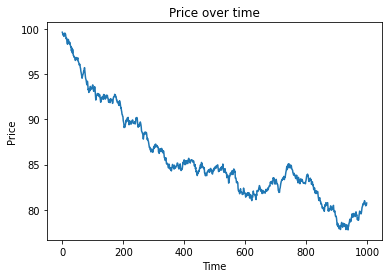

In [5]:
#Classical Brownian Motion

# Define parameters
mu = 0  # mean of return
sigma = 0.2  # standard deviation of return
T = 1000  # time horizon
n = 1000  # number of simulations

# Define initial price
p_0 = 100

# Calculate prices at time T
sum_p_t = []
for i in range(n):
  r = np.random.normal(mu, sigma, T)
  p_t = p_0 + np.cumsum(r)
  sum_p_t.append(p_t[-1])

# Calculate expected value of price at time T
E_p_t = np.mean(sum_p_t)

# Calculate standard deviation of price at time T
std_p_t = np.std(sum_p_t)

print(f"Expected value of price at time T: {E_p_t}")
print(f"Standard deviation of price at time T: {std_p_t}")

# Plot price over time
plt.plot(p_t)
plt.title("Price over time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [6]:
exp_sd = sigma * np.sqrt(T)
exp_sd

6.324555320336759

Mean of P: 97.01556522443481
Standard deviation of P: 66.93666804930811


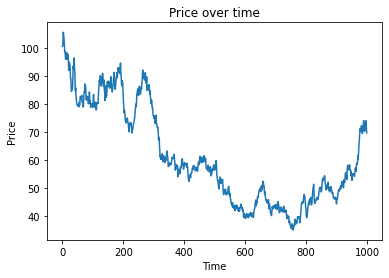

In [11]:
#Arithmetic Return System

# Set simulation parameters
T = 1000  # number of time steps
sigma = 0.02
n = 1000
# Initialize arrayP
P_0 = 100
P_sum = []
p_2 = []
for i in range(n):
    r = np.random.normal(0, sigma, size = T)
    P = P_0 * np.cumprod(1+r)
    P_sum.append(P[-1])
    p_2.append(P[-2])
# Print mean and standard deviation of P
print("Mean of P:", np.mean(P_sum))
print("Standard deviation of P:", np.std(P_sum))

# Plot price over time
plt.plot(P)
plt.title("Price over time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [16]:
exp_sd = np.mean(np.std(p_2))
exp_sd

66.84226006813446

Mean of P: 121.12276053740375
Standard deviation of P: 81.460525362564


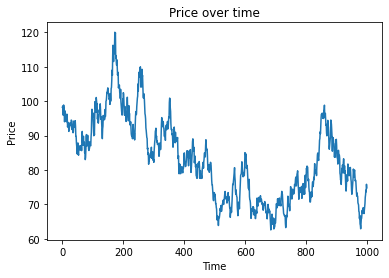

In [153]:
#Geometric Brownian Motion

# Set simulation parameters
T = 1000  # number of time steps
sigma = 0.02
n = 1000
# Initialize arrayP
P_0 = 100
P_sum = []
for i in range(n):
    r = np.random.normal(0, sigma, size = T)
    P = P_0 * np.exp(np.cumsum(r))
    P_sum.append(P[-1])
# Print mean and standard deviation of P
print("Mean of P:", np.mean(P_sum))
print("Standard deviation of P:", np.std(P_sum))

# Plot price over time
plt.plot(P)
plt.title("Price over time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [159]:
mu = (sigma**2/2)
exp_mean = P_0 * np.exp(mu*T)
exp_sd = P_0 * np.sqrt((np.exp(sigma**2 * T) - 1) * np.exp(2 * mu * T))
exp_mean, exp_sd

(122.14027581601698, 85.65723733877934)

## Problem 2

In [167]:
def return_calculate(prices, method='DISCRETE', date_column='date'):
    vars = prices.columns
    n_vars = len(vars)
    vars = [v for v in vars if v != date_column]
    if n_vars == len(vars):
        raise ValueError(f'{date_column} not in DataFrame {vars}')
    n_vars = len(vars)
    p = prices[vars].to_numpy()
    n, m = p.shape
    p2 = np.empty((n - 1, m))
    for i in range(n - 1):
        p2[i, :] = p[i + 1, :] / p[i, :]
    if method.upper() == 'DISCRETE':
        p2 -= 1.0
    elif method.upper() == 'LOG':
        p2 = np.log(p2)
    else:
        raise ValueError(f'method {method} must be in ("LOG", "DISCRETE")')
    dates = prices.iloc[1:, prices.columns.get_loc(date_column)]
    out = pd.DataFrame({date_column: dates})
    for i in range(n_vars):
        out[vars[i]] = p2[:, i]
    return out

In [191]:
from google.colab import drive
drive.mount('/content/drive')
portfolio = pd.read_csv('/content/drive/MyDrive/Fintech545_HW3/portfolio.csv')
prices = pd.read_csv('/content/drive/MyDrive/Fintech545_HW3/DailyPrices.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
#Arithmetic return
areturn = return_calculate(prices, method='DISCRETE', date_column='Date')
areturn

<ipython-input-167-e8110a22f8f6>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]


,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,2/15/2022 0:00,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2,2/16/2022 0:00,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
3,2/17/2022 0:00,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
4,2/18/2022 0:00,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
5,2/22/2022 0:00,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2/3/2023 0:00,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
245,2/6/2023 0:00,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
246,2/7/2023 0:00,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618
247,2/8/2023 0:00,-0.010935,-0.017653,-0.003102,-0.020174,0.022763,-0.076830,-0.074417,-0.042741,0.001443,...,-0.008469,-0.004456,-0.001289,-0.018009,-0.004416,0.002819,-0.015526,0.004106,-0.015391,0.009363


In [187]:
meta = areturn['META']
meta = meta - np.mean(meta)
meta

1      0.015175
2     -0.020165
3     -0.040761
4     -0.007446
5     -0.019774
         ...   
244   -0.011850
245   -0.002503
246    0.029899
247   -0.042725
248   -0.030022
Name: META, Length: 248, dtype: float64

In [190]:
# Define portfolio size and confidence level
#portfolio_size = 1_000_000
confidence_level = 0.95

# 1. VaR using normal distribution
std_dev = meta.std()
z_score = stats.norm.ppf(confidence_level)
var_normal = -(std_dev * z_score)
print(f"VaR using normal distribution: {var_normal:.5f}")

# 2. VaR using normal distribution with EWM variance (lambda = 0.94)
variance = meta.ewm(alpha=0.06).var().iloc[-1]
std_dev_ewm = np.sqrt(variance)
z_score_ewm = stats.norm.ppf(confidence_level)
var_ewm = -(std_dev_ewm * z_score_ewm)
print(f"VaR using normal distribution with EWM variance: {var_ewm:.5f}")

# 3. VaR using MLE fitted T distribution
params = stats.t.fit(meta)
t_dist = stats.t(*params)
var_tdist = -t_dist.ppf(confidence_level)
print(f"VaR using MLE fitted T distribution: {var_tdist:.5f}")

# 4. VaR using fitted AR(1) model
model = sm.tsa.AR(meta)
results = model.fit(maxlag=1)
rho = results.params[1]
var_ar1 = -(rho * meta.mean() + np.sqrt(1 - rho ** 2) * meta.std() * stats.norm.ppf(confidence_level))
print(f"VaR using fitted AR(1) model: {var_ar1:.5f}")

# 5. VaR using Historic Simulation
data_sorted = meta.sort_values()
var_hist = -data_sorted.quantile(1 - confidence_level)
print(f"VaR using Historic Simulation: {var_hist:.5f}")

VaR using normal distribution: -0.06560
VaR using normal distribution with EWM variance: -0.09019
VaR using MLE fitted T distribution: -0.05693
VaR using fitted AR(1) model: -0.06560
VaR using Historic Simulation: 0.05462


## Problem 3

In [246]:
# Get the list of stocks in each portfolio
portfolio_A = portfolio[portfolio['Portfolio'] == 'A']['Stock'].tolist()
portfolio_B = portfolio[portfolio['Portfolio'] == 'B']['Stock'].tolist()
portfolio_C = portfolio[portfolio['Portfolio'] == 'C']['Stock'].tolist()

# Get the number of holdings for each stock in each portfolio
holdings_A = portfolio[portfolio['Portfolio'] == 'A']['Holding'].tolist()
holdings_B = portfolio[portfolio['Portfolio'] == 'B']['Holding'].tolist()
holdings_C = portfolio[portfolio['Portfolio'] == 'C']['Holding'].tolist()

# Get the daily prices for the stocks in each portfolio
portfolio_A_prices = prices[portfolio_A].values
portfolio_B_prices = prices[portfolio_B].values
portfolio_C_prices = prices[portfolio_C].values

# Calculate the daily returns for each portfolio
portfolio_A_returns = np.diff(np.log(portfolio_A_prices), axis=0)
portfolio_B_returns = np.diff(np.log(portfolio_B_prices), axis=0)
portfolio_C_returns = np.diff(np.log(portfolio_C_prices), axis=0)

# Calculate the covariance matrix for each portfolio using an exponentially weighted covariance with lambda = 0.94
cov_A = np.cov(portfolio_A_returns, rowvar=False, aweights=np.power(0.94, np.arange(len(portfolio_A_returns)-1, -1, -1)))
cov_B = np.cov(portfolio_B_returns, rowvar=False, aweights=np.power(0.94, np.arange(len(portfolio_B_returns)-1, -1, -1)))
cov_C = np.cov(portfolio_C_returns, rowvar=False, aweights=np.power(0.94, np.arange(len(portfolio_C_returns)-1, -1, -1)))

# Calculate the total covariance matrix using an exponentially weighted covariance with lambda = 0.94
total_returns = np.concatenate((portfolio_A_returns, portfolio_B_returns, portfolio_C_returns), axis=1)
total_cov = np.cov(total_returns, rowvar=False, aweights=np.power(0.94, np.arange(len(total_returns)-1, -1, -1)))

# Calculate the portfolio values for each portfolio
portfolio_A_values = portfolio_A_prices[-1,:] * holdings_A
portfolio_B_values = portfolio_B_prices[-1,:] * holdings_B
portfolio_C_values = portfolio_C_prices[-1,:] * holdings_C

# Calculate the total portfolio value
total_portfolio_value = np.sum(portfolio_A_values) + np.sum(portfolio_B_values) + np.sum(portfolio_C_values)

# Calculate the VaR for each portfolio and the total VaR
confidence_level = 0.95
z_score = norm.ppf(confidence_level)
portfolio_A_var = z_score * np.sqrt(np.dot(portfolio_A_values, np.dot(cov_A, portfolio_A_values)))
portfolio_B_var = z_score * np.sqrt(np.dot(portfolio_B_values, np.dot(cov_B, portfolio_B_values)))
portfolio_C_var = z_score * np.sqrt(np.dot(portfolio_C_values, np.dot(cov_C, portfolio_C_values)))
total_var = z_score * np.sqrt(np.dot(np.concatenate((portfolio_A_values, portfolio_B_values, portfolio_C_values)), np.dot(total_cov, np.concatenate((portfolio_A_values, portfolio_B_values, portfolio_C_values)))))

print(f"Portfolio A VaR: ${portfolio_A_var}")
print(f"Portfolio B VaR: ${portfolio_B_var}")
print(f"Portfolio C VaR: ${portfolio_C_var}")
print(f"Portfolio total VaR: ${total_var}")

Portfolio A VaR: $5691.545367913773
Portfolio B VaR: $4531.820720018284
Portfolio C VaR: $3837.7173331134054
Portfolio total VaR: $13704.717058155928


In [247]:
# Get the list of stocks in each portfolio
portfolio_A = portfolio[portfolio['Portfolio'] == 'A']['Stock'].tolist()
portfolio_B = portfolio[portfolio['Portfolio'] == 'B']['Stock'].tolist()
portfolio_C = portfolio[portfolio['Portfolio'] == 'C']['Stock'].tolist()

# Get the number of holdings for each stock in each portfolio
holdings_A = portfolio[portfolio['Portfolio'] == 'A']['Holding'].tolist()
holdings_B = portfolio[portfolio['Portfolio'] == 'B']['Holding'].tolist()
holdings_C = portfolio[portfolio['Portfolio'] == 'C']['Holding'].tolist()

# Get the daily prices for the stocks in each portfolio
portfolio_A_prices = prices[portfolio_A].values
portfolio_B_prices = prices[portfolio_B].values
portfolio_C_prices = prices[portfolio_C].values

# Calculate the daily returns for each portfolio
portfolio_A_returns = np.diff(np.log(portfolio_A_prices), axis=0)
portfolio_B_returns = np.diff(np.log(portfolio_B_prices), axis=0)
portfolio_C_returns = np.diff(np.log(portfolio_C_prices), axis=0)

# Calculate the covariance matrix for each portfolio using an AR(1) model
rho = 0.94  # Autoregression coefficient
sigma2_A = np.var(portfolio_A_returns, axis=0, ddof=1)
sigma2_B = np.var(portfolio_B_returns, axis=0, ddof=1)
sigma2_C = np.var(portfolio_C_returns, axis=0, ddof=1)
cov_A = rho * sigma2_A[:, None] * sigma2_A[None, :]
cov_B = rho * sigma2_B[:, None] * sigma2_B[None, :]
cov_C = rho * sigma2_C[:, None] * sigma2_C[None, :]

# Calculate the total covariance matrix using an AR(1) model
total_returns = np.concatenate((portfolio_A_returns, portfolio_B_returns, portfolio_C_returns), axis=1)
sigma2_total = np.var(total_returns, axis=0, ddof=1)
total_cov = rho * sigma2_total[:, None] * sigma2_total[None, :]

# Calculate the portfolio values for each portfolio
portfolio_A_values = portfolio_A_prices[-1,:] * holdings_A
portfolio_B_values = portfolio_B_prices[-1,:] * holdings_B
portfolio_C_values = portfolio_C_prices[-1,:] * holdings_C

# Calculate the total portfolio value
total_portfolio_value = np.sum(portfolio_A_values) + np.sum(portfolio_B_values) + np.sum(portfolio_C_values)

# Calculate the VaR for each portfolio and the total VaR
confidence_level = 0.95
z_score = norm.ppf(confidence_level)
portfolio_A_var = z_score * np.sqrt(np.dot(portfolio_A_values, np.dot(cov_A, portfolio_A_values)))
portfolio_B_var = z_score * np.sqrt(np.dot(portfolio_B_values, np.dot(cov_B, portfolio_B_values)))
portfolio_C_var = z_score * np.sqrt(np.dot(portfolio_C_values, np.dot(cov_C, portfolio_C_values)))
total_var = z_score * np.sqrt(np.dot(np.concatenate((portfolio_A_values, portfolio_B_values, portfolio_C_values)), np.dot(total_cov, np.concatenate((portfolio_A_values, portfolio_B_values, portfolio_C_values)))))

print(f"Portfolio A VaR: ${portfolio_A_var}")
print(f"Portfolio B VaR: ${portfolio_B_var}")
print(f"Portfolio C VaR: ${portfolio_C_var}")
print(f"Portfolio total VaR: ${total_var}")

Portfolio A VaR: $259.31091393274534
Portfolio B VaR: $220.6713737467063
Portfolio C VaR: $172.94982943584452
Portfolio total VaR: $652.9321171152961
